In [1]:
%matplotlib inline

## This notebook explores data which combines UFC fighters characteristics(collected from http://ufc.com) and fighting stats(collected from http://sherdog.com).

In [2]:
# imports
import pandas as pd
from matplotlib import pyplot as plt

from predict import COLUMN_ORDER

### Data preparation

In [3]:
data = pd.read_pickle('./data/train.pickle')[COLUMN_ORDER]

In [4]:
data

,age_diff,height_diff,weight_diff,hand_reach_diff,leg_reach_diff,wins_diff,loses_diff,draws_diff,result
0,-1.0,3.0,0.0,2.0,0.0,-5.0,2.0,0.0,0.0
1,5.0,-8.0,0.0,-8.0,-3.0,-7.0,-3.0,0.0,1.0
2,3.0,-3.0,-10.0,5.0,0.0,11.0,-6.0,0.0,1.0
3,-7.0,-3.0,0.0,-4.0,0.0,3.0,-1.0,0.0,1.0
4,12.0,-3.0,0.0,-1.0,0.0,10.0,11.0,0.0,1.0
5,8.0,5.0,0.0,-4.0,0.0,-6.0,2.0,0.0,0.0
6,7.0,-13.0,-15.0,-10.0,-3.0,0.0,4.0,0.0,0.0
7,5.0,-10.0,-5.0,-1.0,-2.0,17.0,2.0,0.0,0.0
8,-4.0,-3.0,0.0,-1.0,-2.0,-1.0,-3.0,0.0,1.0
9,6.0,8.0,15.0,7.0,0.0,6.0,-5.0,0.0,1.0


In [81]:
age_data = data[['age_diff', 'result']].apply(lambda x: [abs(x.age_diff),abs((x.age_diff<0) - x.result)],axis=1)
height_data = data[['height_diff', 'result']].apply(lambda x: [abs(x.height_diff),abs((x.height_diff<0) - x.result)],axis=1)
weight_data = data[['weight_diff', 'result']].apply(lambda x: [abs(x.weight_diff),abs((x.weight_diff<0) - x.result)],axis=1)
hand_reach_data = data[['hand_reach_diff', 'result']].apply(lambda x: [abs(x.hand_reach_diff),abs((x.hand_reach_diff<0) - x.result)],axis=1)
leg_reach_data = data[['leg_reach_diff', 'result']].apply(lambda x: [abs(x.leg_reach_diff),abs((x.leg_reach_diff<0) - x.result)],axis=1)
wins_data = data[['wins_diff', 'result']].apply(lambda x: [abs(x.wins_diff),abs((x.wins_diff<0) - x.result)],axis=1)
loses_data = data[['loses_diff', 'result']].apply(lambda x: [abs(x.loses_diff),abs((x.loses_diff<0) - x.result)],axis=1)
draws_data = data[['draws_diff', 'result']].apply(lambda x: [abs(x.draws_diff),abs((x.draws_diff<0) - x.result)],axis=1)

DATA_MAPPER = {
    'age': age_data,
    'height': height_data,
    'weight': weight_data,
    'hand_reach': hand_reach_data,
    'leg_reach': leg_reach_data,
    'wins': wins_data,
    'loses': loses_data,
    'draws': draws_data
}

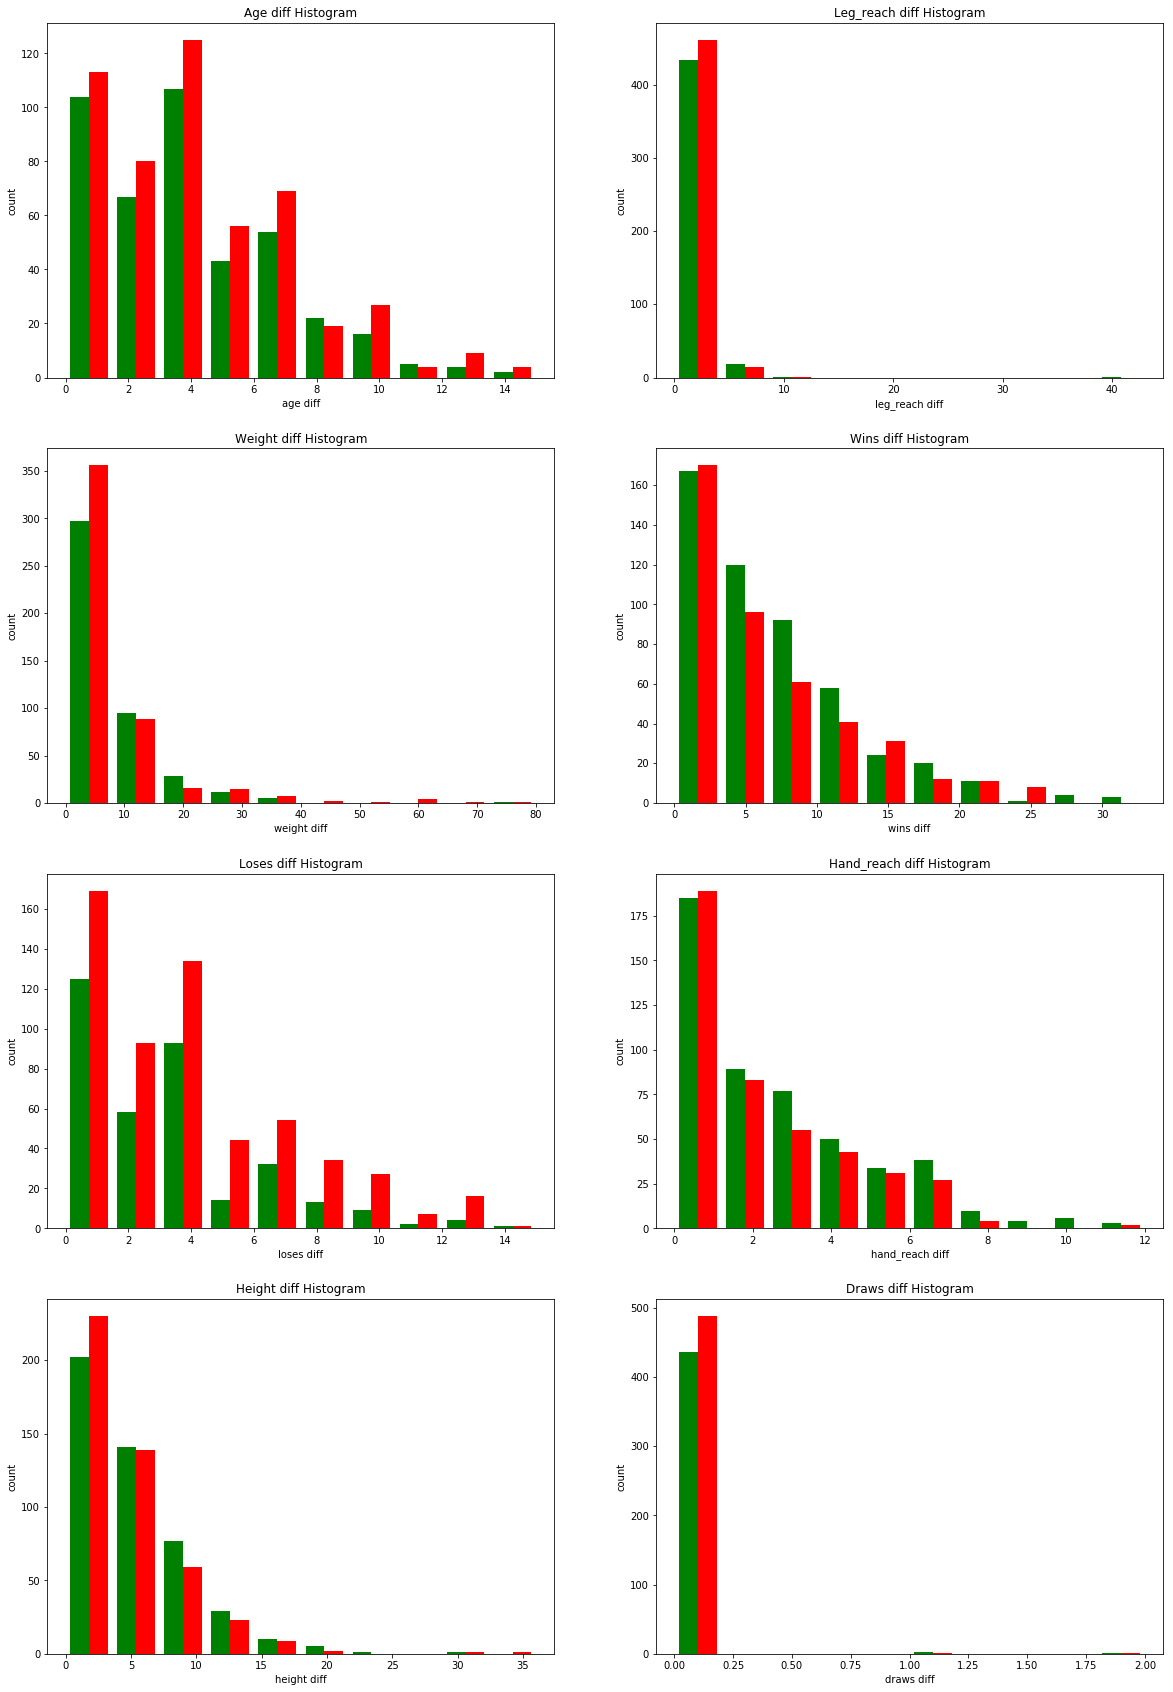

In [83]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(ncols=2, nrows=4, figsize=(20, 30))

fig.subplots_adjust(wspace=0.2)

for ax, colname in zip([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8], DATA_MAPPER.keys()):
    coldata = DATA_MAPPER[colname]
    ax.hist(
        (coldata[coldata['result'] == 1][colname + '_diff'], coldata[coldata['result'] == 0][colname + '_diff']),
        color=('green', 'red')
    )
    ax.set_title("{} diff Histogram".format(colname.capitalize()))
    ax.set_xlabel(colname + " diff")
    ax.set_ylabel("count")